### Insurance Claim Prediction


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [35]:
# Load Dataset

data = pd.read_csv('data.csv')

# Display the first few rows of the dataset

data.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [16]:
# Check for missing values and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [17]:
# Assume 'Claim' is the target variable and others are features
# Separate features and target variable

X = data.drop(columns=['Claim'])
y = data['Claim']

In [23]:
# Identify numeric and categorical columns

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [24]:
# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



# 1. SimpleImputer for Missing Values:

# Numeric Features: Missing values are imputed with the mean of the column.

# Categorical Features: Missing values are imputed with the most frequent value (mode) of the column.

# 2. Pipeline Adjustments:

# The numeric and categorical transformers now include an imputation step before scaling or encoding.

# 3. Increased Max Iterations for Logistic Regression:

# Set max_iter=1000 to ensure convergence in case the default of 100 iterations is insufficient.

In [25]:
# Create the pipeline with preprocessing and model

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

In [26]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train the model on the training data

model.fit(X_train, y_train)

# Predict probabilities for the training and test data

y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

In [28]:
# Calculate ROC AUC for training and testing sets

train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f'Training ROC AUC: {train_roc_auc}')
print(f'Test ROC AUC: {test_roc_auc}')

Training ROC AUC: 0.9601664234591063
Test ROC AUC: 0.690973244767296


In [36]:
# Plot ROC curves for both training and test datasets

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

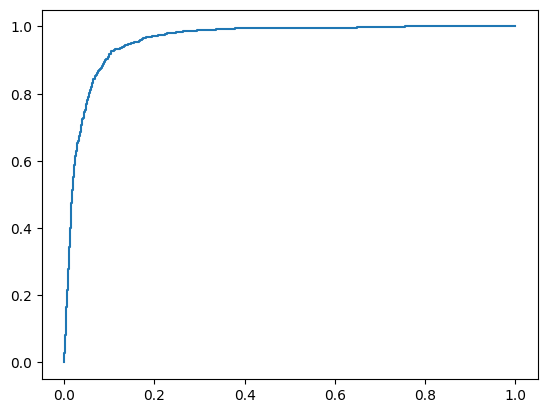

In [30]:
# Training ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {train_roc_auc:.2f})')

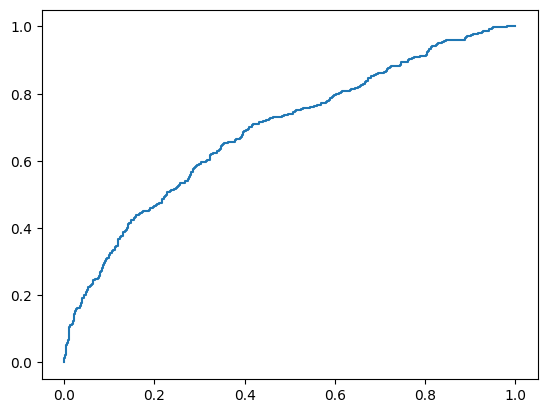

In [31]:
# Test ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {test_roc_auc:.2f})')

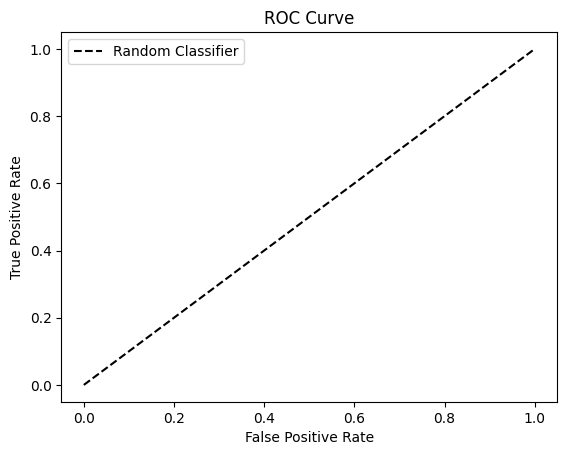

In [32]:
# Plotting the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_curve.png')
plt.show()

In [37]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [38]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
output.to_csv('predictions.csv', index=False)
print('Predictions saved to predictions.csv')

Predictions saved to predictions.csv
